# OpenSAFELY COVID Vaccine coverage report: Second doses 

OpenSAFELY is a new secure analytics platform for electronic patient records built on behalf of NHS England to deliver urgent academic and operational research during the pandemic. 

This is an extension of our [regular weekly report](https://reports.opensafely.org/reports/vaccine-coverage/) on COVID-19 vaccination coverage in England using data from 40% of general practices that use TPP electronic health record software. **The data requires careful interpretation and there are a number of caveats. Please read the full detail about our methods and discussion of our earlier results (as of 17 March 2021) in our [peer-reviewed publication in the British Journal of General Practice](https://doi.org/10.3399/BJGP.2021.0376).** 

The full analytical methods behind the latest results in this report are available [here](https://github.com/opensafely/nhs-covid-vaccination-uptake).

**Update: As of 17th January 2022, our vaccine reports will be published fortnightly.  If you rely on weekly data updates for your own reporting or analysis please contact team@opensafely.org to let us know.**

## Second doses

**Please note** This report is intended to highlight any differences between subgroups of priority cohorts in receiving second doses, only including those which are due (i.e. where at least 14 weeks has passed since the first dose). **It is therefore NOT a comprehensive view of all second doses given to date** - to see these figures please refer to the main report. 

In [1]:
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format='png'

from IPython.display import display, Markdown
import os
import pandas as pd
pd.set_option("display.max_rows", 200)
import sys
sys.path.append('../lib/')
from create_report import find_and_sort_filenames
from second_third_doses import *

backend = os.getenv("OPENSAFELY_BACKEND", "expectations")
suffix = "_tpp"

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

with open(os.path.join("..", "interim-outputs","text", "latest_date.txt"), 'r') as file:
    latest_date_fmt = file.read()
    display(Markdown(f"### Second dose vaccinations included up to **{latest_date_fmt}** inclusive"))
    
with open(os.path.join("..", "interim-outputs","text", "latest_date_of_first_dose_for_due_second_doses.txt"), 'r') as file:
    latest_date_14w_fmt = file.read()
    
display(Markdown(
    f"### Only persons who had their first dose between the start of the campaign (**7 Dec 2020**) \
    and 14 weeks ago (**{latest_date_14w_fmt}**) are included in the 'due' group."))

### Report last updated **04 Mar 2022**

### Second dose vaccinations included up to **15 Feb 2022** inclusive

### Only persons who had their first dose between the start of the campaign (**7 Dec 2020**)     and 14 weeks ago (**09 Nov 2021**) are included in the 'due' group.

##  
## Contents

**Cumulative second dose vaccination figures among:**
- [**80+** population](#Cumulative-second-dose-vaccination-figures-among-80+-population)
- [**70-79** population](#Cumulative-second-dose-vaccination-figures-among-70-79-population)
- [**Care home** population](#Cumulative-second-dose-vaccination-figures-among-care-home-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-shielding-(aged-16-69)-population"><strong>Shielding (aged 16-69)</strong> population</a>
- [**65-69** population](#Cumulative-second-dose-vaccination-figures-among-65-69-population)
- <a href="#Cumulative-second-dose-vaccination-figures-among-Learning-Disabilities-(aged-16-64)-population"><strong>LD (aged 16-64)</strong> population</a>
- [**60-64** population](#Cumulative-second-dose-vaccination-figures-among-60-64-population)
- [**55-59** population](#Cumulative-second-dose-vaccination-figures-among-55-59-population)
- [**50-54** population](#Cumulative-second-dose-vaccination-figures-among-50-54-population)
- [**40-49** population](#Cumulative-second-dose-vaccination-figures-among-40-49-population)
- [**30-39** population](#Cumulative-second-dose-vaccination-figures-among-30-39-population)
- [**18-29** population](#Cumulative-second-dose-vaccination-figures-among-18-29-population)
- [**16-17** population](#Cumulative-second-dose-vaccination-figures-among-16-17-population)

[**SUMMARY**](#Summary)


In [2]:
with open('../lib/group_definitions.txt') as f:
    group_defs = f.read()
    display(Markdown(group_defs))

### Group definitions
- As of 29 Nov 2021, patient age is calculated at 31 Aug 2021 (previously 31 March 2021), in line with [national reporting](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1036047/Vaccine_surveillance_report_-_week_47.pdf). 
- The **care home** group is defined based on patients (aged 65+) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).
- The **shielding** group is defined based on patients (aged 16-69) having one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/shield/v1/) provided it was not superceded by one of [these codes](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/nonshield/v1/).            
- The **LD** (learning disability) group is defined based on patients (aged 16-64) having one of [these](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/learndis/v1/) codes and excludes people who are shielding.
- Patients are counted in their highest risk category only; e.g. a 65-year-old who is shielding is only counted in the shielding group, not in the 65-69 group.
- The **housebound** group is defined based on [this](https://codelists.opensafely.org/codelist/opensafely/housebound/5bc77310/)
codelist and excludes people who were later recorded as [not housebound](https://codelists.opensafely.org/codelist/opensafely/no-longer-housebound/29a88ca6/) or in a [care home](https://codelists.opensafely.org/codelist/primis-covid19-vacc-uptake/longres/v1/).


/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 80+ population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           2,940   
Sex                                       F                                                                 1,519   
                                          M                                                                 1,421   
Age band                                  0                                                                    42   
                                          0-15                                                                203   
                                          16-17                                                               189   
                                          18-29                                                               161   
                                          30-34                                                               168   
                                          35-39                                                               182   
                                          40-44                                                               196   
                                          45-49                                                               203   
                                          50-54                                                               210   
                                          55-59                                                               210   
                                          60-64                                                               217   
                                          65-69                                                               189   
                                          70-74                                                               203   
                                          75-79                                                               161   
                                          80-84                                                               168   
                                          85-89                                                               196   
                                          90+                                                                  49   
Ethnicity (broad categories)              Black                                                               483   
                                          Mixed                                                               511   
                                          Other                                                               497   
                                          South Asian                                                         504   
                                          Unknown                                                             441   
                                          White                                                               511   
ethnicity 16 groups                        African                                                            147   
                                           Bangladeshi or British Bangladeshi                                 182   
                                           Caribbean                                                          168   
                                           Chinese                                                            154   
                                           Other                                                              147   
                                           Other Asian                                                        154   
                                          British or Mixed British                                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 80+ Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

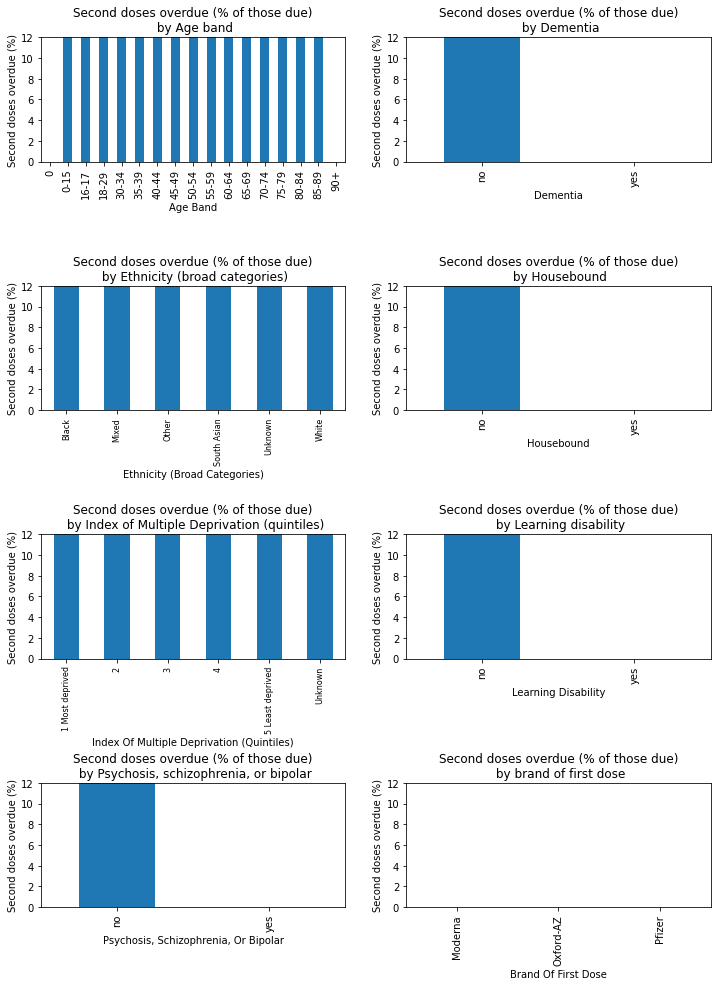

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 70-79 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,879   
Sex                                       F                                                                 2,443   
                                          M                                                                 2,436   
Age band                                  0                                                                    70   
                                          0-15                                                                350   
                                          16-17                                                               329   
                                          18-29                                                               308   
                                          30-34                                                               287   
                                          35-39                                                               315   
                                          40-44                                                               322   
                                          45-49                                                               301   
                                          50-54                                                               322   
                                          55-59                                                               329   
                                          60-64                                                               329   
                                          65-69                                                               280   
                                          70-74                                                               308   
                                          75-79                                                               315   
                                          80-84                                                               322   
                                          85-89                                                               329   
                                          90+                                                                  49   
Ethnicity (broad categories)              Black                                                               819   
                                          Mixed                                                               826   
                                          Other                                                               812   
                                          South Asian                                                         791   
                                          Unknown                                                             756   
                                          White                                                               868   
ethnicity 16 groups                        African                                                            266   
                                           Bangladeshi or British Bangladeshi                                 245   
                                           Caribbean                                                          252   
                                           Chinese                                                            252   
                                           Other                                                              259   
                                           Other Asian                                                        280   
                                          British or Mixed British                                  

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 70-79 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

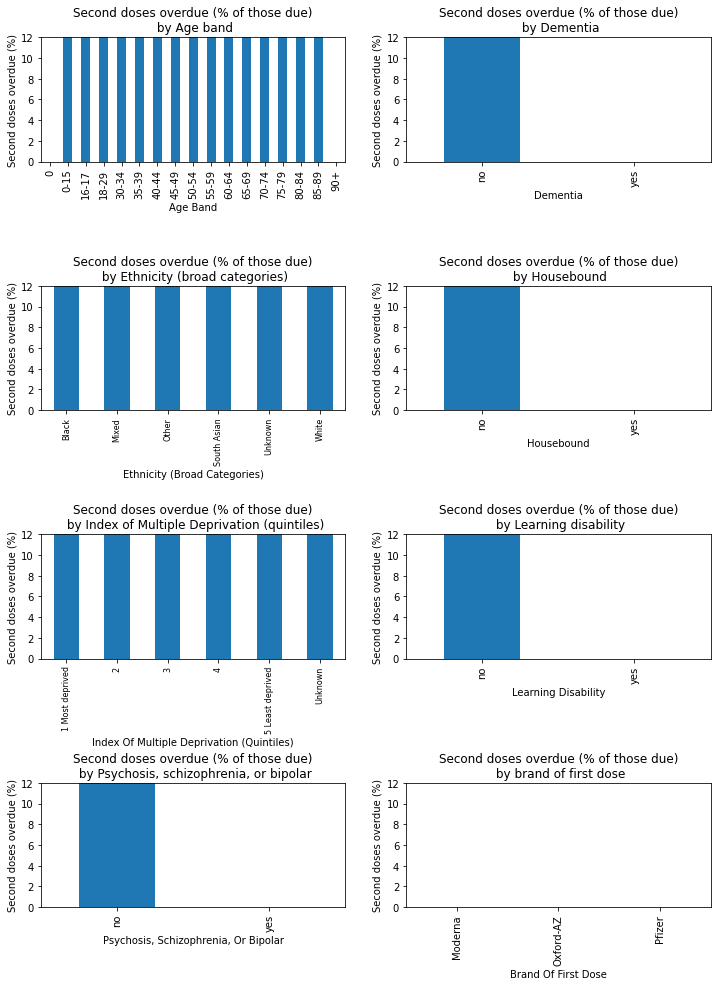

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among care home population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                     Group                                             
overall                      overall                                   1,960   
Sex                          F                                         1,036   
                             M                                           924   
Age band                     0                                            35   
                             0-15                                        119   
                             16-17                                       105   
                             18-29                                       119   
                             30-34                                       133   
                             35-39                                       133   
                             40-44                                       140   
                             45-49                                       126   
                             50-54                                       147   
                             55-59                                       119   
                             60-64                                       133   
                             65-69                                       126   
                             70-74                                       133   
                             75-79                                       133   
                             80-84                                       119   
                             85-89                                       105   
                             90+                                          28   
Ethnicity (broad categories) Black                                       343   
                             Mixed                                       336   
                             Other                                       329   
                             South Asian                                 343   
                             Unknown                                     287   
                             White                                       315   
Dementia                     no                                        1,939   
                             yes                                          14   
brand of first dose          Moderna                                       0   
                             Oxford-AZ                                     0   
                             Unknown                                   1,953   

                                         Second doses overdue (n)  \
Category                     Group                                  
overall                      overall                          392   
Sex                          F                                210   
                             M                                175   
Age band                     0                                  7   
                             0-15                              28   
                             16-17                             14   
                             18-29                             21   
                             30-34                             21   
                             35-39                             28   
                             40-44                             35   
                             45-49                             28   
                             50-54                             35   
                             55-59                             21   
                             60-64                             28   
                             65-69                             21   
                             70-74                             21   
                             75-79                             28   
                             80-84                             21   
                    

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population includes those known to live in an elderly care home, based upon clinical coding.

## 
 ## Second Doses Overdue Among Care Home Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

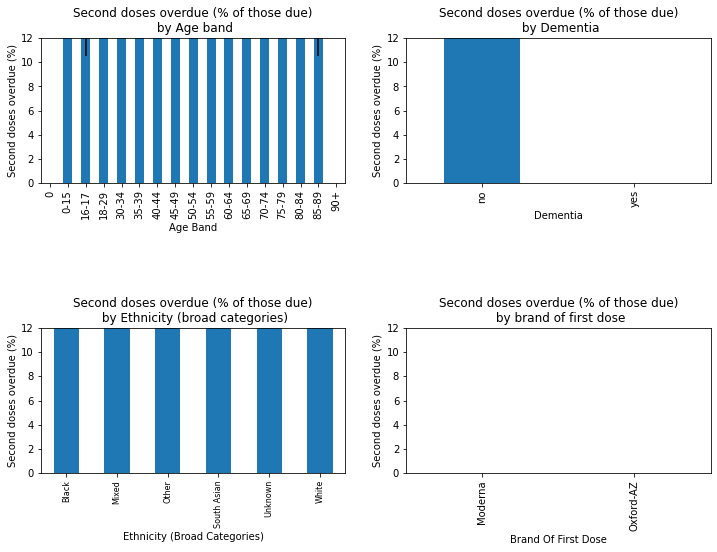

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among shielding (aged 16-69) population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                  
overall                                   overall                                          560   
newly shielded since feb 15               no                                               560   
                                          yes                                                0   
Sex                                       F                                                287   
                                          M                                                273   
Age band                                  16-29                                             70   
                                          30-39                                             77   
                                          40-49                                             63   
                                          50-59                                             70   
                                          60-69                                             70   
                                          70-79                                            126   
                                          80+                                               77   
Ethnicity (broad categories)              Black                                             91   
                                          Mixed                                            105   
                                          Other                                             91   
                                          South Asian                                      105   
                                          Unknown                                           70   
                                          White                                             98   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                  112   
                                          2                                                105   
                                          3                                                 91   
                                          4                                                105   
                                          5 Least deprived                                 105   
                                          Unknown                                           42   
Learning disability                       no                                               553   
                                          yes                                                7   
Chronic kidney disease                    no                                               455   
                                          yes                                              112   
brand of first dose                       Unknown                                          560   

                                                           Second doses overdue (n)  \
Category                                  Group                                       
overall                                   overall                               112   
newly shielded since feb 15               no                                    112   
                                          yes                                     0   
Sex                                       F                                      56   
                                          M                                      56   
Age band                                  16-29                                  21   
                                          30-39                                  14   
                                          40-49                                  14   
                                          50-59                                   7   
                                          60-69                

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those over 65 known to live in an elderly care home, based upon clinical coding.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among Shielding (Aged 16-69) Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

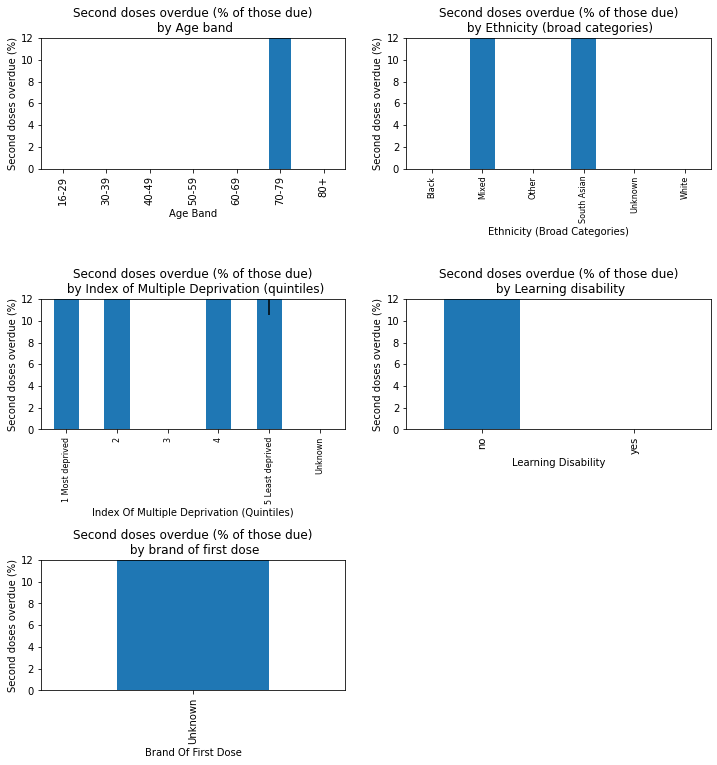

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 65-69 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           3,010   
Sex                                       F                                                                 1,477   
                                          M                                                                 1,533   
Ethnicity (broad categories)              Black                                                               511   
                                          Mixed                                                               511   
                                          Other                                                               518   
                                          South Asian                                                         483   
                                          Unknown                                                             469   
                                          White                                                               511   
ethnicity 16 groups                        African                                                            168   
                                           Bangladeshi or British Bangladeshi                                 175   
                                           Caribbean                                                          154   
                                           Chinese                                                            168   
                                           Other                                                              175   
                                           Other Asian                                                        168   
                                          British or Mixed British                                            126   
                                          Indian or British Indian                                            147   
                                          Irish                                                               140   
                                          Other Black                                                         161   
                                          Other White                                                         182   
                                          Other mixed                                                         175   
                                          Pakistani or British Pakistani                                      154   
                                          Unknown                                                             448   
                                          White + Asian                                                       154   
                                          White + Black African                                               161   
                                          White + Black Caribbean                                             154   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     574   
                                          2                                                                   595   
                                          3                                                                   560   
                                          4                                                                   546   
                                          5 Least deprived                                                    553   
                                          Unknown                                                             175   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those known to live in an elderly care home, based upon clinical coding.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 65-69 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

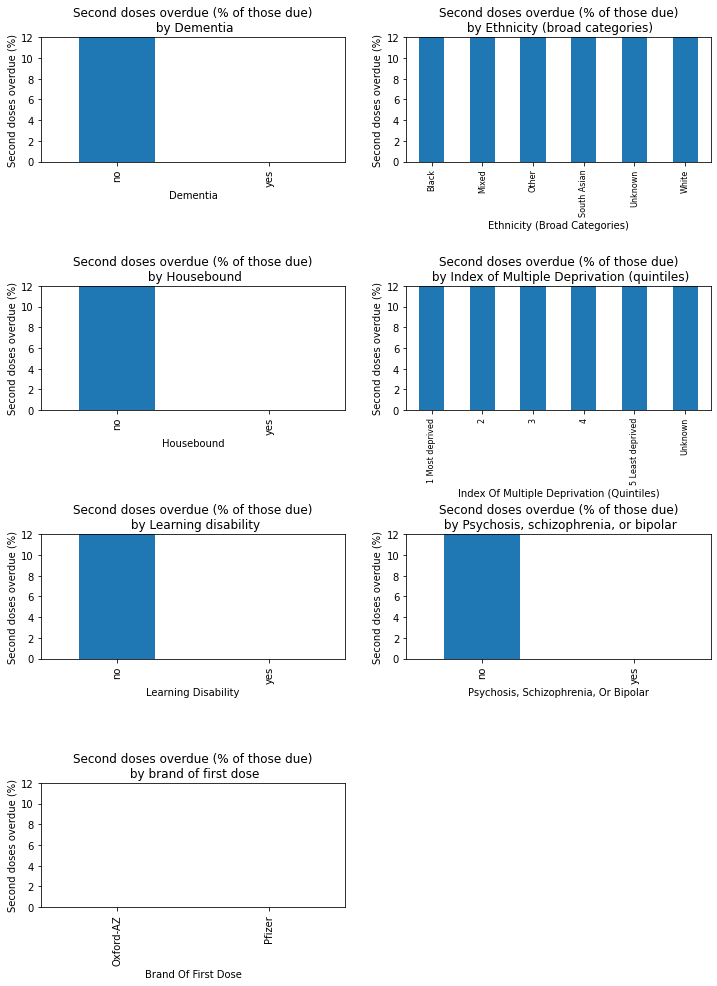

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among Learning Disabilities (aged 16-64) population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                     Group                                             
overall                      overall                                   1,113   
Sex                          F                                           553   
                             M                                           560   
Age band                     0                                            14   
                             0-15                                         77   
                             16-17                                        56   
                             18-29                                        77   
                             30-34                                        77   
                             35-39                                        77   
                             40-44                                        70   
                             45-49                                        84   
                             50-54                                        70   
                             55-59                                        63   
                             60-64                                        70   
                             65-69                                        70   
                             70-74                                        63   
                             75-79                                        84   
                             80-84                                        70   
                             85-89                                        77   
                             90+                                          14   
Ethnicity (broad categories) Black                                       168   
                             Mixed                                       210   
                             Other                                       175   
                             South Asian                                 196   
                             Unknown                                     168   
                             White                                       196   
brand of first dose          Pfizer                                        0   
                             Unknown                                   1,113   

                                         Second doses overdue (n)  \
Category                     Group                                  
overall                      overall                          224   
Sex                          F                                112   
                             M                                112   
Age band                     0                                  0   
                             0-15                              14   
                             16-17                             14   
                             18-29                             14   
                             30-34                             21   
                             35-39                             14   
                             40-44                              7   
                             45-49                             14   
                             50-54                             14   
                             55-59                             14   
                             60-64                             14   
                             65-69                              7   
                             70-74                              7   
                             75-79                             21   
                             80-84                             21   
                             85-89                             21   
                             90+                                0   
Ethnicity (broad categories) Black                             35   
                             Mixed                   

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

## 
 ## Second Doses Overdue Among People With Learning Disabilities (Aged 16-64)

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

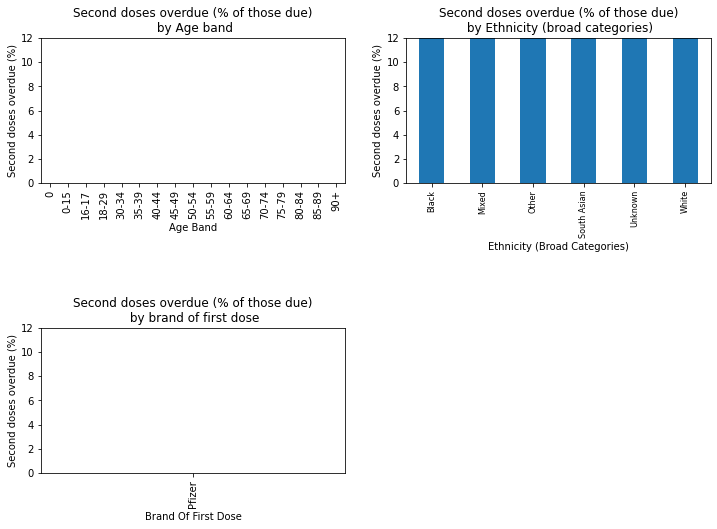

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 60-64 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           3,696   
Sex                                       F                                                                 1,883   
                                          M                                                                 1,806   
Ethnicity (broad categories)              Black                                                               609   
                                          Mixed                                                               623   
                                          Other                                                               637   
                                          South Asian                                                         644   
                                          Unknown                                                             574   
                                          White                                                               616   
ethnicity 16 groups                        African                                                            182   
                                           Bangladeshi or British Bangladeshi                                 196   
                                           Caribbean                                                          196   
                                           Chinese                                                            210   
                                           Other                                                              189   
                                           Other Asian                                                        196   
                                          British or Mixed British                                            196   
                                          Indian or British Indian                                            168   
                                          Irish                                                               175   
                                          Other Black                                                         210   
                                          Other White                                                         203   
                                          Other mixed                                                         210   
                                          Pakistani or British Pakistani                                      224   
                                          Unknown                                                             560   
                                          White + Asian                                                       189   
                                          White + Black African                                               196   
                                          White + Black Caribbean                                             182   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     679   
                                          2                                                                   700   
                                          3                                                                   707   
                                          4                                                                   707   
                                          5 Least deprived                                                    714   
                                          Unknown                                                             189   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 60-64 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

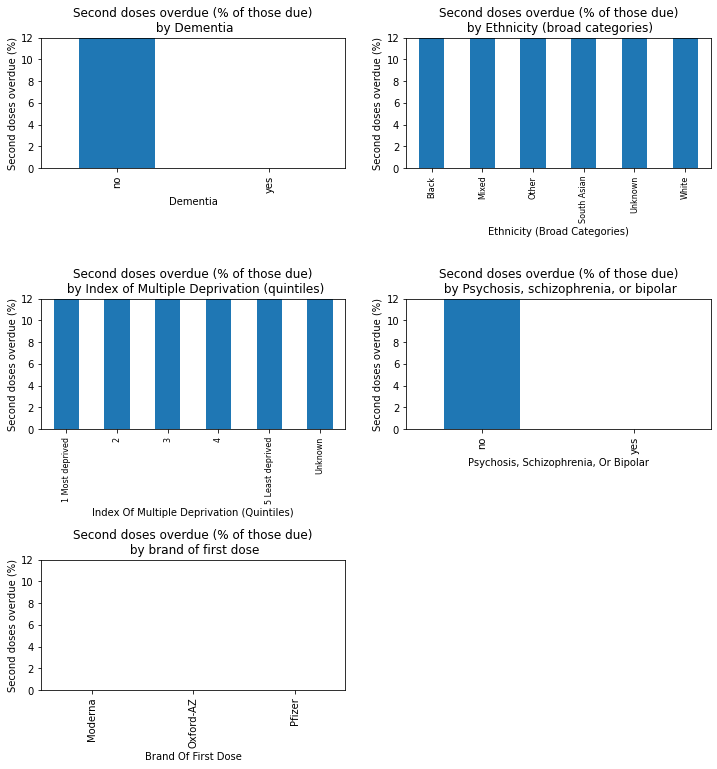

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 55-59 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,277   
Sex                                       F                                                                 2,191   
                                          M                                                                 2,086   
Ethnicity (broad categories)              Black                                                               721   
                                          Mixed                                                               756   
                                          Other                                                               693   
                                          South Asian                                                         700   
                                          Unknown                                                             637   
                                          White                                                               763   
ethnicity 16 groups                        African                                                            217   
                                           Bangladeshi or British Bangladeshi                                 217   
                                           Caribbean                                                          245   
                                           Chinese                                                            210   
                                           Other                                                              231   
                                           Other Asian                                                        231   
                                          British or Mixed British                                            252   
                                          Indian or British Indian                                            203   
                                          Irish                                                               238   
                                          Other Black                                                         217   
                                          Other White                                                         238   
                                          Other mixed                                                         238   
                                          Pakistani or British Pakistani                                      238   
                                          Unknown                                                             630   
                                          White + Asian                                                       231   
                                          White + Black African                                               217   
                                          White + Black Caribbean                                             217   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     749   
                                          2                                                                   847   
                                          3                                                                   833   
                                          4                                                                   798   
                                          5 Least deprived                                                    826   
                                          Unknown                                                             224   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 55-59 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

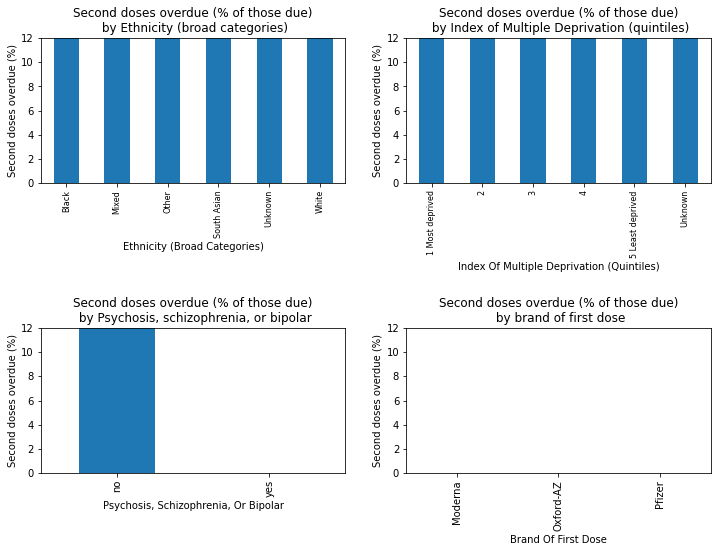

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 50-54 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           4,788   
Sex                                       F                                                                 2,429   
                                          M                                                                 2,359   
Ethnicity (broad categories)              Black                                                               861   
                                          Mixed                                                               819   
                                          Other                                                               826   
                                          South Asian                                                         784   
                                          Unknown                                                             693   
                                          White                                                               812   
ethnicity 16 groups                        African                                                            252   
                                           Bangladeshi or British Bangladeshi                                 252   
                                           Caribbean                                                          280   
                                           Chinese                                                            217   
                                           Other                                                              259   
                                           Other Asian                                                        273   
                                          British or Mixed British                                            273   
                                          Indian or British Indian                                            245   
                                          Irish                                                               245   
                                          Other Black                                                         252   
                                          Other White                                                         238   
                                          Other mixed                                                         252   
                                          Pakistani or British Pakistani                                      287   
                                          Unknown                                                             735   
                                          White + Asian                                                       238   
                                          White + Black African                                               252   
                                          White + Black Caribbean                                             238   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                     924   
                                          2                                                                   959   
                                          3                                                                   875   
                                          4                                                                   903   
                                          5 Least deprived                                                    882   
                                          Unknown                                                             252   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- Population excludes those who are shielding.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 50-54 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

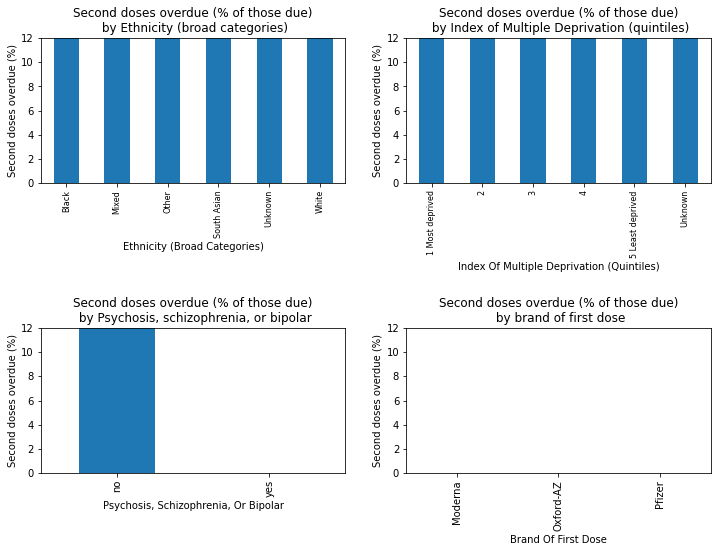

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 40-49 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           8,449   
Sex                                       F                                                                 4,347   
                                          M                                                                 4,102   
Ethnicity (broad categories)              Black                                                             1,400   
                                          Mixed                                                             1,463   
                                          Other                                                             1,442   
                                          South Asian                                                       1,435   
                                          Unknown                                                           1,288   
                                          White                                                             1,421   
ethnicity 16 groups                        African                                                            420   
                                           Bangladeshi or British Bangladeshi                                 455   
                                           Caribbean                                                          497   
                                           Chinese                                                            455   
                                           Other                                                              469   
                                           Other Asian                                                        406   
                                          British or Mixed British                                            448   
                                          Indian or British Indian                                            469   
                                          Irish                                                               448   
                                          Other Black                                                         483   
                                          Other White                                                         441   
                                          Other mixed                                                         441   
                                          Pakistani or British Pakistani                                      420   
                                          Unknown                                                           1,260   
                                          White + Asian                                                       427   
                                          White + Black African                                               462   
                                          White + Black Caribbean                                             441   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,617   
                                          2                                                                 1,652   
                                          3                                                                 1,582   
                                          4                                                                 1,561   
                                          5 Least deprived                                                  1,638   
                                          Unknown                                                             392   
BMI                                       30+                                                       

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

- SSRIs group excludes individuals with Psychosis/ schizophrenia/bipolar, LD, or Dementia.

- Chronic kidney disease is defined as the presence of a relevant diagnostic code, or a most recent stage recorded >= 3.

## 
 ## Second Doses Overdue Among 40-49 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

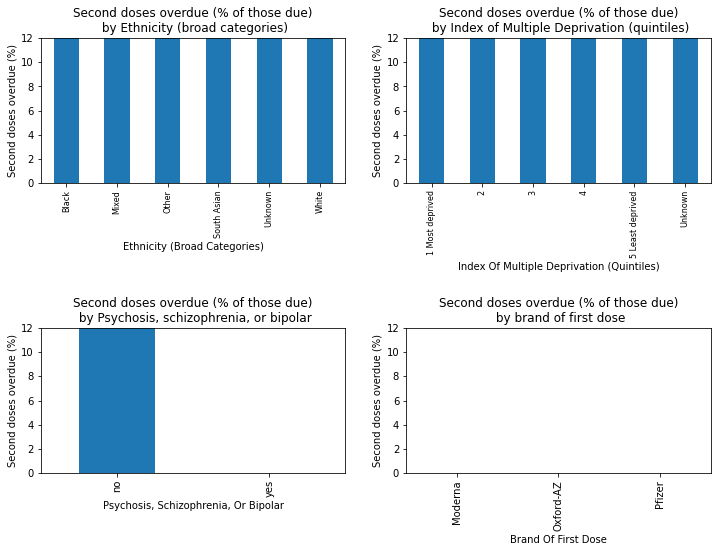

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 30-39 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                           8,967   
Sex                                       F                                                                 4,487   
                                          M                                                                 4,480   
Ethnicity (broad categories)              Black                                                             1,589   
                                          Mixed                                                             1,519   
                                          Other                                                             1,470   
                                          South Asian                                                       1,505   
                                          Unknown                                                           1,351   
                                          White                                                             1,533   
ethnicity 16 groups                        African                                                            448   
                                           Bangladeshi or British Bangladeshi                                 476   
                                           Caribbean                                                          497   
                                           Chinese                                                            434   
                                           Other                                                              448   
                                           Other Asian                                                        476   
                                          British or Mixed British                                            476   
                                          Indian or British Indian                                            504   
                                          Irish                                                               553   
                                          Other Black                                                         476   
                                          Other White                                                         483   
                                          Other mixed                                                         504   
                                          Pakistani or British Pakistani                                      455   
                                          Unknown                                                           1,372   
                                          White + Asian                                                       462   
                                          White + Black African                                               483   
                                          White + Black Caribbean                                             434   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,736   
                                          2                                                                 1,701   
                                          3                                                                 1,694   
                                          4                                                                 1,687   
                                          5 Least deprived                                                  1,680   
                                          Unknown                                                             462   
brand of first dose                       Moderna                                                   

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

## 
 ## Second Doses Overdue Among 30-39 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

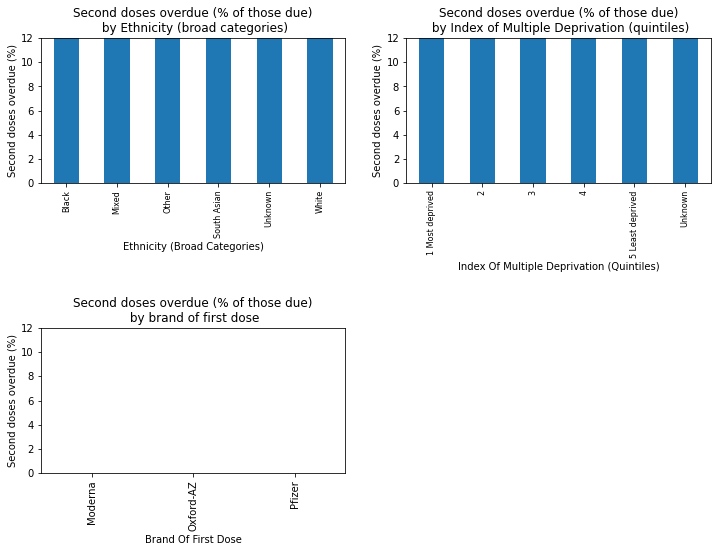

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 18-29 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                                     
overall                                   overall                                                          10,395   
Sex                                       F                                                                 5,390   
                                          M                                                                 4,998   
Ethnicity (broad categories)              Black                                                             1,771   
                                          Mixed                                                             1,778   
                                          Other                                                             1,750   
                                          South Asian                                                       1,778   
                                          Unknown                                                           1,568   
                                          White                                                             1,743   
ethnicity 16 groups                        African                                                            525   
                                           Bangladeshi or British Bangladeshi                                 567   
                                           Caribbean                                                          588   
                                           Chinese                                                            546   
                                           Other                                                              567   
                                           Other Asian                                                        560   
                                          British or Mixed British                                            567   
                                          Indian or British Indian                                            560   
                                          Irish                                                               553   
                                          Other Black                                                         518   
                                          Other White                                                         574   
                                          Other mixed                                                         560   
                                          Pakistani or British Pakistani                                      574   
                                          Unknown                                                           1,519   
                                          White + Asian                                                       546   
                                          White + Black African                                               546   
                                          White + Black Caribbean                                             518   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                                   1,939   
                                          2                                                                 1,960   
                                          3                                                                 2,009   
                                          4                                                                 1,981   
                                          5 Least deprived                                                  1,953   
                                          Unknown                                                             560   
brand of first dose                       Moderna                                                   

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

## 
 ## Second Doses Overdue Among 18-29 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

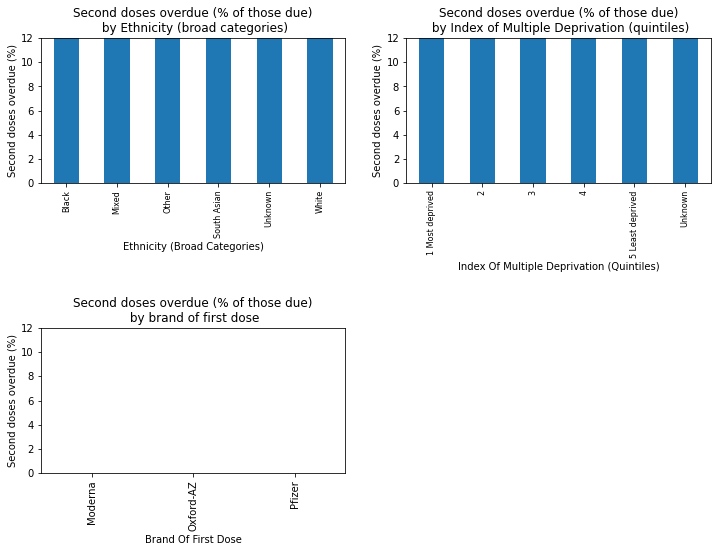

/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:71: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(["Previous week's vaccination coverage (%)", "Total eligible", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:74: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df2.drop(["Previous week's vaccination coverage (%)", "Vaccinated over last 7d (%)"],1)
/Users/lisahopcroft/Work/Projects/COVID-VACCINE-REPORTS/covid-vaccine-preliminary-uptake-study/notebooks/../lib/second_third_doses.py:96: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will b

[Back to top](#Contents)

## 
 ## Cumulative second dose vaccination figures among 16-17 population 
 Please refer to footnotes below table for information.

Second Doses due at 15 Feb 2022 (n)  \
Category                                  Group                                                  
overall                                   overall                                       14,413   
Sex                                       F                                              7,287   
                                          M                                              7,133   
Ethnicity (broad categories)              Black                                          2,450   
                                          Mixed                                          2,394   
                                          Other                                          2,471   
                                          South Asian                                    2,394   
                                          Unknown                                        2,170   
                                          White                                          2,541   
Index of Multiple Deprivation (quintiles) 1 Most deprived                                2,772   
                                          2                                              2,793   
                                          3                                              2,744   
                                          4                                              2,625   
                                          5 Least deprived                               2,744   
                                          Unknown                                          735   
brand of first dose                       Moderna                                            7   
                                          Oxford-AZ                                         14   
                                          Pfizer                                            21   
                                          Unknown                                       14,364   

                                                           Second doses overdue (n)  \
Category                                  Group                                       
overall                                   overall                             2,898   
Sex                                       F                                   1,456   
                                          M                                   1,449   
Ethnicity (broad categories)              Black                                 490   
                                          Mixed                                 483   
                                          Other                                 504   
                                          South Asian                           455   
                                          Unknown                               434   
                                          White                                 539   
Index of Multiple Deprivation (quintiles) 1 Most deprived                       567   
                                          2                                     553   
                                          3                                     532   
                                          4                                     525   
                                          5 Least deprived                      574   
                                          Unknown                               147   
brand of first dose                       Moderna                                 7   
                                          Oxford-AZ                               0   
                                          Pfizer                                  7   
                                          Unknown                             2,884   

                                                           Second doses given (n)  \
Category                                  Group                                     
ov

**Footnotes:**


- Patient counts rounded to the nearest 7.

- Only persons who are currently registered and had their first dose at least 14 weeks ago are included in the 'due' group.

## 
 ## Second Doses Overdue Among 16-17 Population

Second doses which have not been given at least 14 weeks since the first dose

Error bars indicate possible error caused by rounding

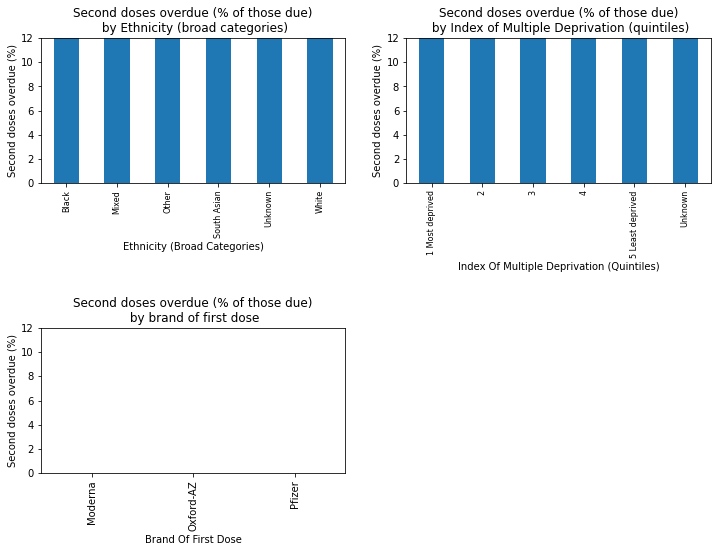

## 
 # Summary

,Second Doses due at 15 Feb 2022 (n),Second doses overdue (n),Second doses given (n),Second doses given (% of due),Total population
80+,"2,940",623,"2,317",78.8,"4,186"
70-79,"4,879",959,"3,920",80.3,"7,007"
care home,"1,960",392,"1,568",80.0,"2,828"
shielding (aged 16-69),560,112,448,80.0,861
65-69,"3,010",581,"2,429",80.7,"4,305"
LD (aged 16-64),"1,113",224,889,79.9,"1,631"
60-64,"3,696",784,"2,912",78.8,"5,320"
55-59,"4,277",854,"3,423",80.0,"6,188"
50-54,"4,788",994,"3,794",79.2,"6,965"
40-49,"8,449","1,694","6,755",80.0,"12,187"


In [3]:
tablelist = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                    pre_string="among ", tail_string=" population.csv",
                                    population_subset="Cumulative first dose 14w ago",
                                    # files_to_exclude=["Cumulative first dose 14w ago vaccination figures among 16-17 population.csv"],
                                    )
    
# get 2nd dose figures for each group
tablelist_2nd = find_and_sort_filenames("tables", by_demographics_or_population="population", 
                                        pre_string="among ", tail_string=" population.csv",
                                        population_subset="Cumulative second dose vaccination",
                                        # files_to_exclude=["Cumulative second dose vaccination figures among 16-17 population.csv"],
                                        )


second_third_doses(tablelist, tablelist_2nd, dose_type="Second", time_period="14 weeks",
                   latest_date_fmt=latest_date_fmt,
                   latest_date_fmt_2=latest_date_14w_fmt, 
                   backend=backend, suffix = "_tpp")
   